In [31]:
#!pip install yfinance


In [59]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import gmean

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import gc

np.random.seed(42069)
warnings.simplefilter('ignore')
%matplotlib inline

In [33]:

params = {
    'figure.figsize': (10, 5)
     }
plt.rcParams.update(params)

In [34]:

# This will download data from yahoo finance - more than enough for prototyping
df = yf.download(
        # tickers list or string as well
        tickers = "spy",
        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5y",
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",
        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',
        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,
        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,
        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,
        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [35]:
df.shape

(1260, 5)

In [36]:

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-02-07,209.936580,210.192845,209.332522,209.533875,57931200
2017-02-08,209.533898,209.945751,208.957296,209.808472,51566200
2017-02-09,209.808457,211.373501,209.808457,211.053177,65955200
2017-02-10,211.419283,212.124017,211.071489,211.886047,66015900
2017-02-13,212.407716,213.313804,212.380260,213.039230,55182100


In [37]:

df['avg_price'] = gmean(df[['Open', 'High', 'Low', 'Close']], axis=1)


In [38]:
df['price_mvt'] = gmean(df[['Open', 'High', 'Low', 'Close']], axis=1)

In [39]:

df.head()

,Open,High,Low,Close,Volume,avg_price,price_mvt
Date,,,,,,,
2017-02-07,209.936580,210.192845,209.332522,209.533875,57931200,209.748686,209.748686
2017-02-08,209.533898,209.945751,208.957296,209.808472,51566200,209.561011,209.561011
2017-02-09,209.808457,211.373501,209.808457,211.053177,65955200,210.509696,210.509696
2017-02-10,211.419283,212.124017,211.071489,211.886047,66015900,211.624816,211.624816
2017-02-13,212.407716,213.313804,212.380260,213.039230,55182100,212.784871,212.784871


In [40]:
nullvaluecheck = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %']).head(60)
nullvaluecheck.style.background_gradient(cmap='PuBu')

,missing %
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Volume,0.000000
avg_price,0.000000
price_mvt,0.000000


In [41]:

returns = np.log(df['Close']).diff()
returns.dropna(inplace=True)

In [42]:
display(df)

,Open,High,Low,Close,Volume,avg_price,price_mvt
Date,,,,,,,
2017-02-07,209.936580,210.192845,209.332522,209.533875,57931200,209.748686,209.748686
2017-02-08,209.533898,209.945751,208.957296,209.808472,51566200,209.561011,209.561011
2017-02-09,209.808457,211.373501,209.808457,211.053177,65955200,210.509696,210.509696
2017-02-10,211.419283,212.124017,211.071489,211.886047,66015900,211.624816,211.624816
2017-02-13,212.407716,213.313804,212.380260,213.039230,55182100,212.784871,212.784871
...,...,...,...,...,...,...,...
2022-02-01,450.679993,453.630005,446.940002,452.950012,123155400,451.042420,451.042420
2022-02-02,455.500000,458.119995,453.049988,457.350006,117361000,456.000806,456.000806
2022-02-03,450.950012,452.970001,445.709991,446.600006,118024400,449.047450,449.047450


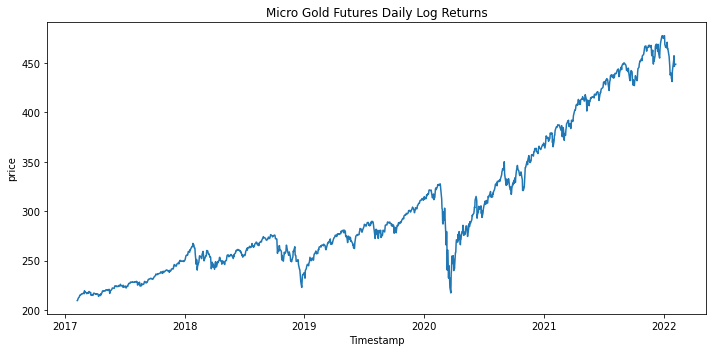

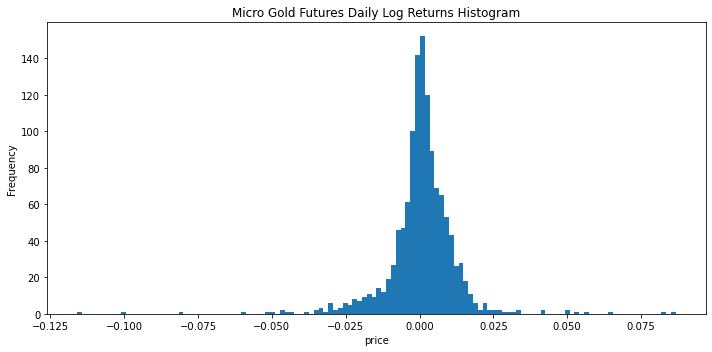

In [43]:
plt.figure()
plt.plot(df['Close'])
plt.title('Micro Gold Futures Daily Log Returns')
plt.xlabel('Timestamp')
plt.ylabel('price')
plt.tight_layout()

plt.figure()
plt.hist(returns, bins='auto')
plt.title('Micro Gold Futures Daily Log Returns Histogram')
plt.ylabel('Frequency')
plt.xlabel('price')
plt.tight_layout()

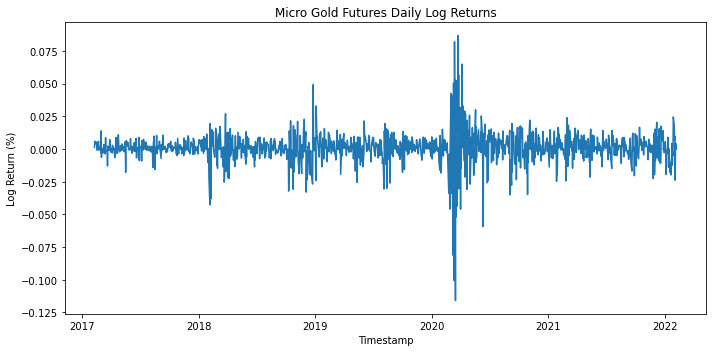

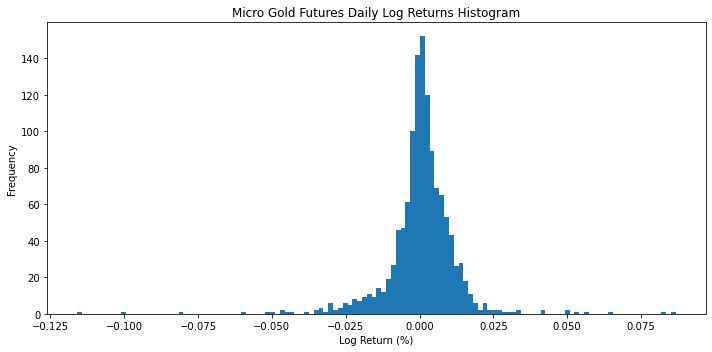

In [44]:
plt.figure()
plt.plot(returns)
plt.title('Micro Gold Futures Daily Log Returns')
plt.xlabel('Timestamp')
plt.ylabel('Log Return (%)')
plt.tight_layout()

plt.figure()
plt.hist(returns, bins='auto')
plt.title('Micro Gold Futures Daily Log Returns Histogram')
plt.ylabel('Frequency')
plt.xlabel('Log Return (%)')
plt.tight_layout()

In [45]:
# 70 - 30 Train Test
split = int(0.3*len(returns))
X = returns[:-split]
X_test = returns[-split:]

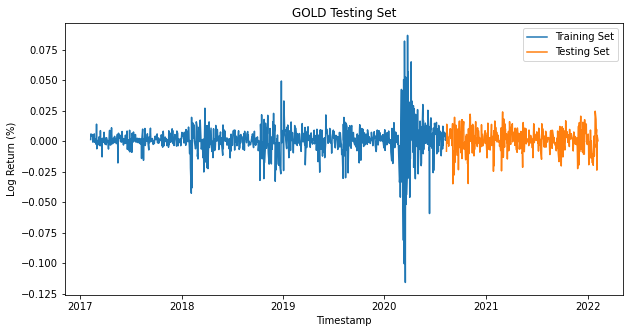

In [46]:
plt.plot(X, label='Training Set')
plt.plot(X_test, label='Testing Set')
plt.title(label='GOLD Testing Set')
plt.xlabel('Timestamp')
plt.ylabel('Log Return (%)')
plt.legend()
plt.show()

In [47]:
#pip install hmmlearn

In [48]:
from hmmlearn import hmm

In [49]:
X = X.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [50]:

model = hmm.GaussianHMM(
    # 2 States
    n_components=2,
    covariance_type="diag",
    verbose=True
)

In [51]:
%%time
model.fit(X)

Wall time: 59.8 ms


         1        1985.3394             +nan
         2        2595.7738        +610.4345
         3        2694.4777         +98.7038
         4        2787.9199         +93.4422
         5        2850.0030         +62.0831
         6        2889.0408         +39.0378
         7        2912.3025         +23.2617
         8        2926.0873         +13.7848
         9        2933.8470          +7.7597
        10        2937.7781          +3.9312


GaussianHMM(n_components=2, verbose=True)

In [52]:
# Adjust the probabilities for transitioning states
model.transmat_ = np.array(
    [
        [0.95, 0.05],
        [0.05, 0.95]
    ]
)

In [53]:
Z = model.predict(X_test)
Z_train = model.predict(X)

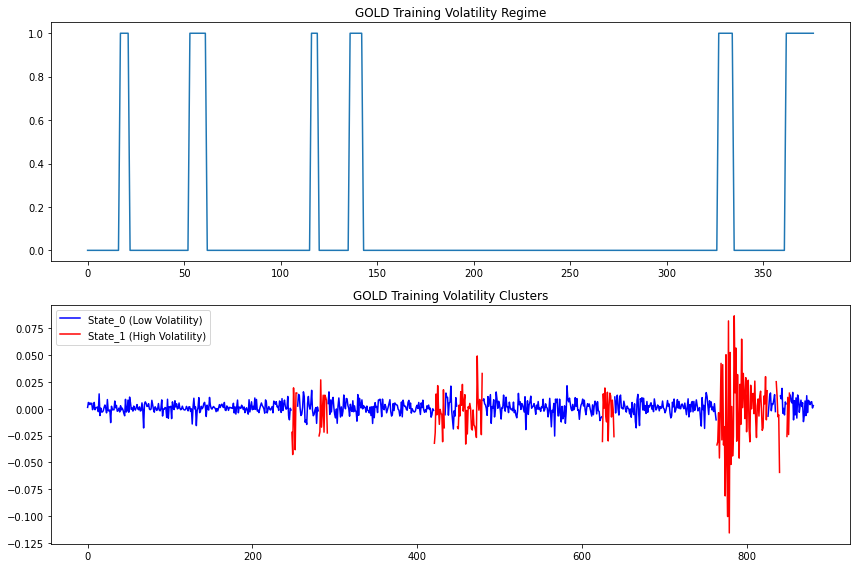

In [54]:

# Compute State Changes
returns_train0 = np.empty(len(Z_train))
returns_train1 = np.empty(len(Z_train))
returns_train0[:] = np.nan
returns_train1[:] = np.nan

# Create series for each state change
returns_train0[Z_train == 0] = returns[:-split][Z_train == 0]
returns_train1[Z_train == 1] = returns[:-split][Z_train == 1]


fig, ax = plt.subplots(figsize=(12,8))

# Plot the Volatility Regime and the states
plt.subplot(211)
plt.plot(Z)
plt.title(label='GOLD Training Volatility Regime')

plt.subplot(212)
plt.plot(returns_train0, label='State_0 (Low Volatility)', color='b')
plt.plot(returns_train1, label='State_1 (High Volatility)', color='r', )
plt.title(label='GOLD Training Volatility Clusters')
plt.legend()
plt.tight_layout()

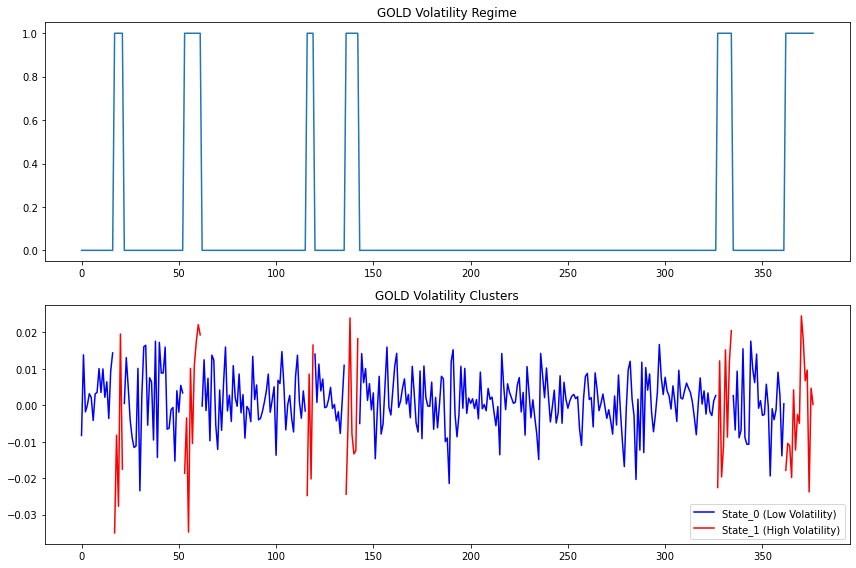

In [55]:

# Compute State Changes
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# Create series for each state change
returns0[Z == 0] = returns[-split:][Z == 0]
returns1[Z == 1] = returns[-split:][Z == 1]

# Plot the Volatility Regime and the states
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(211)
plt.plot(Z)
plt.title(label='GOLD Volatility Regime')

plt.subplot(212)
plt.plot(returns0, label='State_0 (Low Volatility)', color='b')
plt.plot(returns1, label='State_1 (High Volatility)', color='r')
plt.title(label='GOLD Volatility Clusters')

plt.legend()
plt.tight_layout()

In [65]:
display(Z)

df3= pd.DataFrame(Z)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
df2=pd.concat(df,df3)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
list(df2)